<a href="https://colab.research.google.com/github/itsasoblg/DIPC/blob/master/BilayerGrapheneTwisted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twisted Bilayer Graphene

In this notebook, we will try to implement/come up with a general model to describe a system of two sheets of graphene bounded togehter. 

In [1]:
!pip install sisl

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import numpy.linalg as la
import cmath
from google.colab import files
from __future__ import print_function
import sisl
from sisl import *
from IPython.display import Image
import os
import random
import skimage.data
import skimage.transform
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

## AA Stacking. 

We will start with a general model for AA stacking. This can helps us generalize the model for different systems. 

Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
}
[[ 0.    0.    0.  ]
 [ 1.42  0.    0.  ]
 [ 0.    0.   14.2 ]
 [ 1.42  0.   14.2 ]]


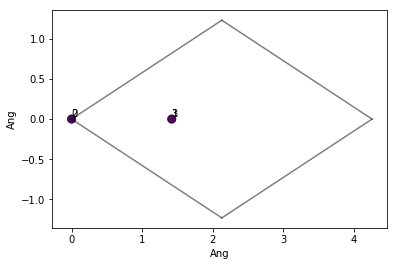

In [3]:
#generating the general model for AA stacking 

aa = sisl.geom.graphene().tile(1,0).tile(2,2)

print(aa) #info

plot(aa,atom_indices= True) #plot of AA with idx
 
print(aa.xyz) #coordinates


#making the 3 coordinate sets into arrays for future 3D plot
xarray = aa.xyz[:,0]

yarray = aa.xyz[:,1]

zarray = aa.xyz[:,2]


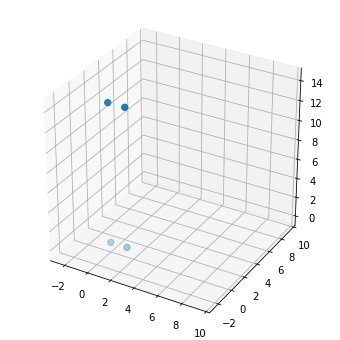

In [4]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,6))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, s = 40)
plt.xlim(-3, 10)
plt.ylim(-3, 10)

plt.gca().set_aspect('equal', adjustable='box') 
plt.draw()

In [9]:
#calculation the band structure of bilayer graphene

#we first construct a blank canvas for the Hamiltonian

H = Hamiltonian(aa)


#now we need to set its values 

#we loop the Hamiltonian

#we want the loop to IGNORE the atoms in the same layer

array = np.array([0,1,2,3])

for ia in aa:
  idx = H.geom.close(ia, R = [0.1, 1.43, 14.2])
  
  H[ia, idx[0]] = 0
  H[ia, idx[1]] = -2.7 #this is the hopping integral within layers
  
  #this loop avoid an index error (remove to check or to implement other options)
  """for idx[2] in array: 
    np.where(H.geom.xyz[idx[2],2] == H.geom.xyz[ia,2], H[io,idx[2]] ,-0.4)
    """
print(H)

    
#this loop can be done in diff ways. Find below the links to other examples

Hamiltonian{non-zero: 16, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 4, no: 4,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 4,
  },
  maxR: 1.43420,
  SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
 }
}


[Tutorial 4 GitHub](https://github.com/zerothi/ts-tbt-sisl-tutorial/blob/aeb5763b5199c45adebe0b9b4da41eb672b60032/TB_04/run.ipynb)

[Example 1](https://github.com/zerothi/sisl/blob/master/examples/ex_01.py)


Keep in mind I have mixed both ways of doing the Hamiltonian loop. 


In [0]:
band = BandStructure(H, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])


eigs = band.eigh()

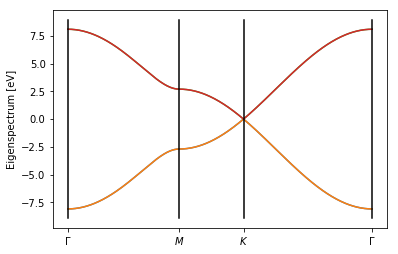

In [12]:
xtick, xtick_label = band.lineartick() #points where the band undergoes changes 
lk = band.lineark() 
plt.plot(lk, eigs)

plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')
    
    
    